In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import rcParams
plt.rcParams['font.size'] = 14
rcParams.update({'figure.autolayout': True})
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter, LogLocator
from matplotlib import rcParams
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker
from matplotlib import rc

c1 = '#14A76C'
c6 = '#AC3B61'
c4 = '#2B7A78'
c2 = '#2E9CCA'
c5 = '#29648A'
c3 = '#F76C6C'

l1 = "#1f77b4"
l2 = "#d62728"
l3 = "#2ca02c"
l4 = "#ff7f0e"

#m,c,k,g,r,b

#plt.rcParams['text.usetex'] = True
timesfont = {'fontname':'Times'}
style.use('seaborn-ticks')

In [2]:
def createActual(x, L):
    temp = []
    for i in range(L):
        temp = np.append(temp, x)
    return temp

In [52]:
file = open(r"G-Symmetry/Q8_GS.txt", "r")

In [53]:
string = file.read()

lis = [float(i) for i in string.split("\n")]

true_value = lis[0]
noiseResilientValue = lis[1]

size_noiseless = int(lis[2])
noiseless_loss = lis[3:3+size_noiseless]

size_noisy = int(lis[3+size_noiseless])
noisy_loss = lis[4+size_noiseless:4+size_noiseless+size_noisy]

file.close()

/opt/anaconda3/envs/qiskit/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


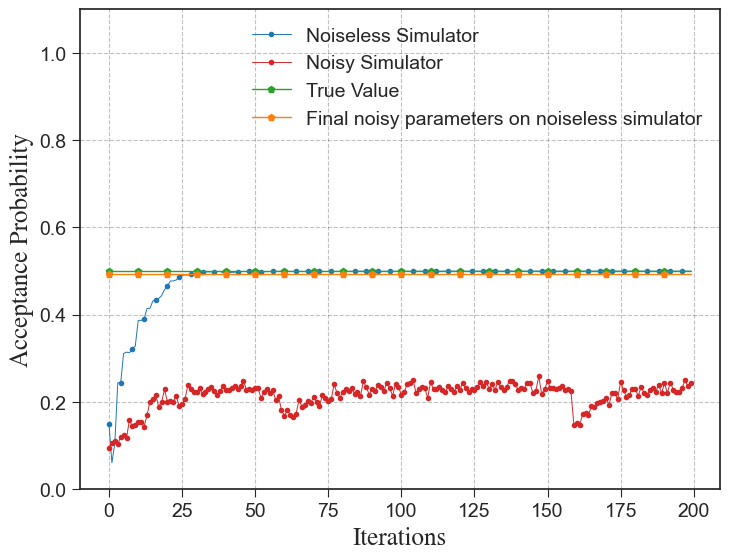

In [55]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(noiseless_loss,'-o', markersize=3, markevery=4, color = l1, linewidth=0.7, label = 'Noiseless Simulator')
ax.plot(noisy_loss,'-o', markersize=3, markevery=1, color = l2, linewidth=0.7, label = 'Noisy Simulator')
ax.plot(createActual(true_value, size_noiseless),'-p', markersize=5, markevery=10, color = l3, linewidth=1, label = 'True Value')
ax.plot(createActual(noiseResilientValue, size_noiseless),'-p', markersize=5, markevery=10, color = l4, linewidth=1, label = 'Final noisy parameters on noiseless simulator')


#ax.set_xscale('log')
ax.set_ylim(0, 1.1)

ax.grid(b=True, which='major', color='#666666', linestyle='--',alpha=0.4)
ax.legend(loc=0)
ax.set_xlabel('Iterations',**timesfont,fontsize =18)
ax.set_ylabel('Acceptance Probability',**timesfont,fontsize =18)
#plt.savefig(r"Plots/Q8_GS.pdf", dpi=2000, format='pdf', bbox_extra_artists=(), bbox_inches='tight')
plt.show()